In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop("Id",axis=1,inplace=True) #dropping the column named id.

In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder() #converting categorical value into numeric values
df['Species']= label.fit_transform(df['Species']) #in this the species names is been converted into the numeric values.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
from sklearn.model_selection import train_test_split
X=df.drop("Species",axis=1) #dropping the species column
y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #splliting the dataset

In [7]:
model=GaussianNB() #gaussian naive bayes 
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9555555555555556

In [8]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred) 
#confusion matrix is a table used to define the performance of a classification algorithm
matrix

array([[15,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 11]])

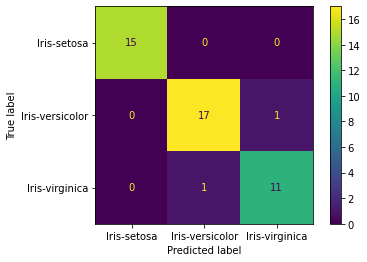

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cmd = ConfusionMatrixDisplay(matrix, display_labels=class_names)
#confusion matrix is a table used to define the performance of a classification algorithm
cmd.plot()

In [10]:
# For Setosa
TP=matrix[0][0]
FN=matrix[0][1]+matrix[0][2]
FP=matrix[1][0]+matrix[2][0]
TN=matrix[1][1]+matrix[1][2]+matrix[2][1]+matrix[2][2]
accuracy=(TP+TN)/(TP+FP+FN+TN)
error_rate=(FP+FN)/(TP+FP+FN+TN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Accuracy: ",accuracy)
print("Error_rate: ",error_rate)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  1.0
Error_rate:  0.0
Precision:  1.0
Recall:  1.0


In [11]:
# For Versicolor
TP=matrix[1][1]
FN=matrix[1][0]+matrix[1][2]
FP=matrix[0][1]+matrix[2][1]
TN=matrix[0][0]+matrix[0][2]+matrix[2][2]+matrix[2][0]
accuracy=(TP+TN)/(TP+FP+FN+TN)
error_rate=(FP+FN)/(TP+FP+FN+TN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Accuracy: ",accuracy)
print("Error_rate: ",error_rate)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  0.9555555555555556
Error_rate:  0.044444444444444446
Precision:  0.9444444444444444
Recall:  0.9444444444444444


In [12]:
# For Versicolor
TP=matrix[2][2]
FN=matrix[2][0]+matrix[2][1]
FP=matrix[0][2]+matrix[1][2]
TN=matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1]
accuracy=(TP+TN)/(TP+FP+FN+TN)
error_rate=(FP+FN)/(TP+FP+FN+TN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Accuracy: ",accuracy)
print("Error_rate: ",error_rate)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  0.9555555555555556
Error_rate:  0.044444444444444446
Precision:  0.9166666666666666
Recall:  0.9166666666666666
